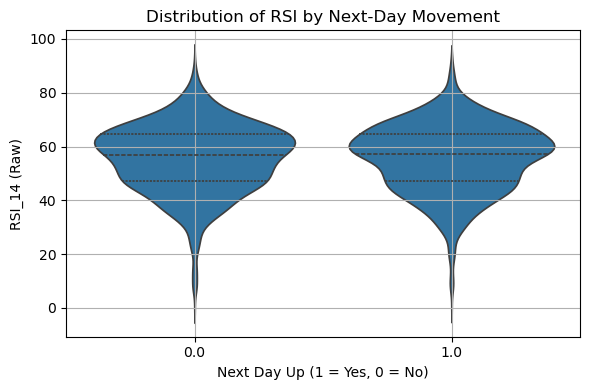

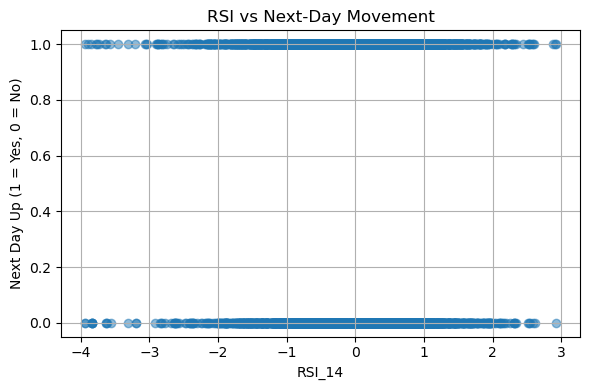

In [ ]:
import price_fea
price_fea.main()

Original shape: (4746, 9)

Created df_plot_smooth with shape (4746, 6)
Successfully saved 3-day features to: Output\sent_features_3d.csv
Successfully saved 5-day features to: Output\sent_features_5d.csv
Successfully saved 7-day features to: Output\sent_features_7d.csv


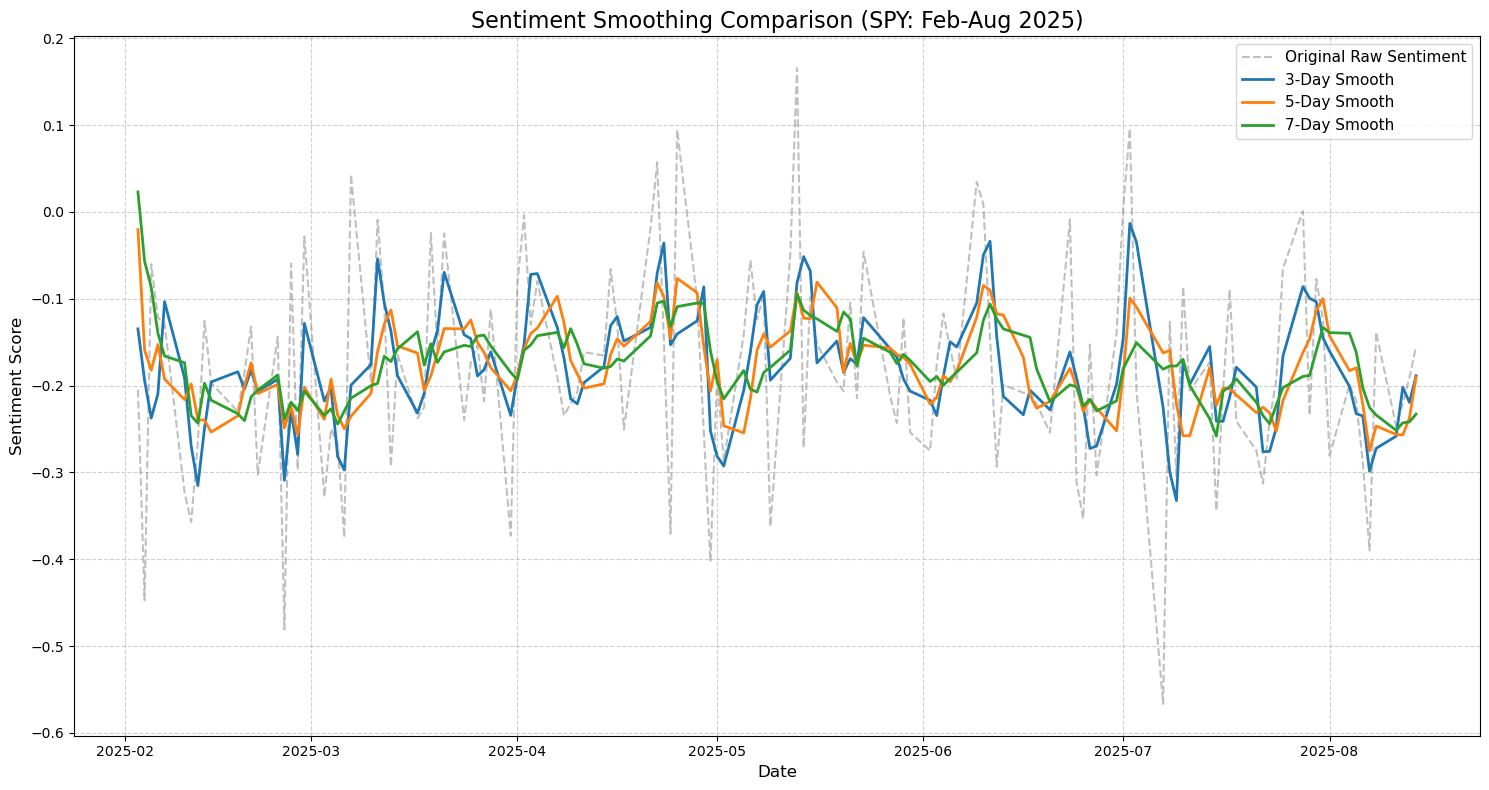

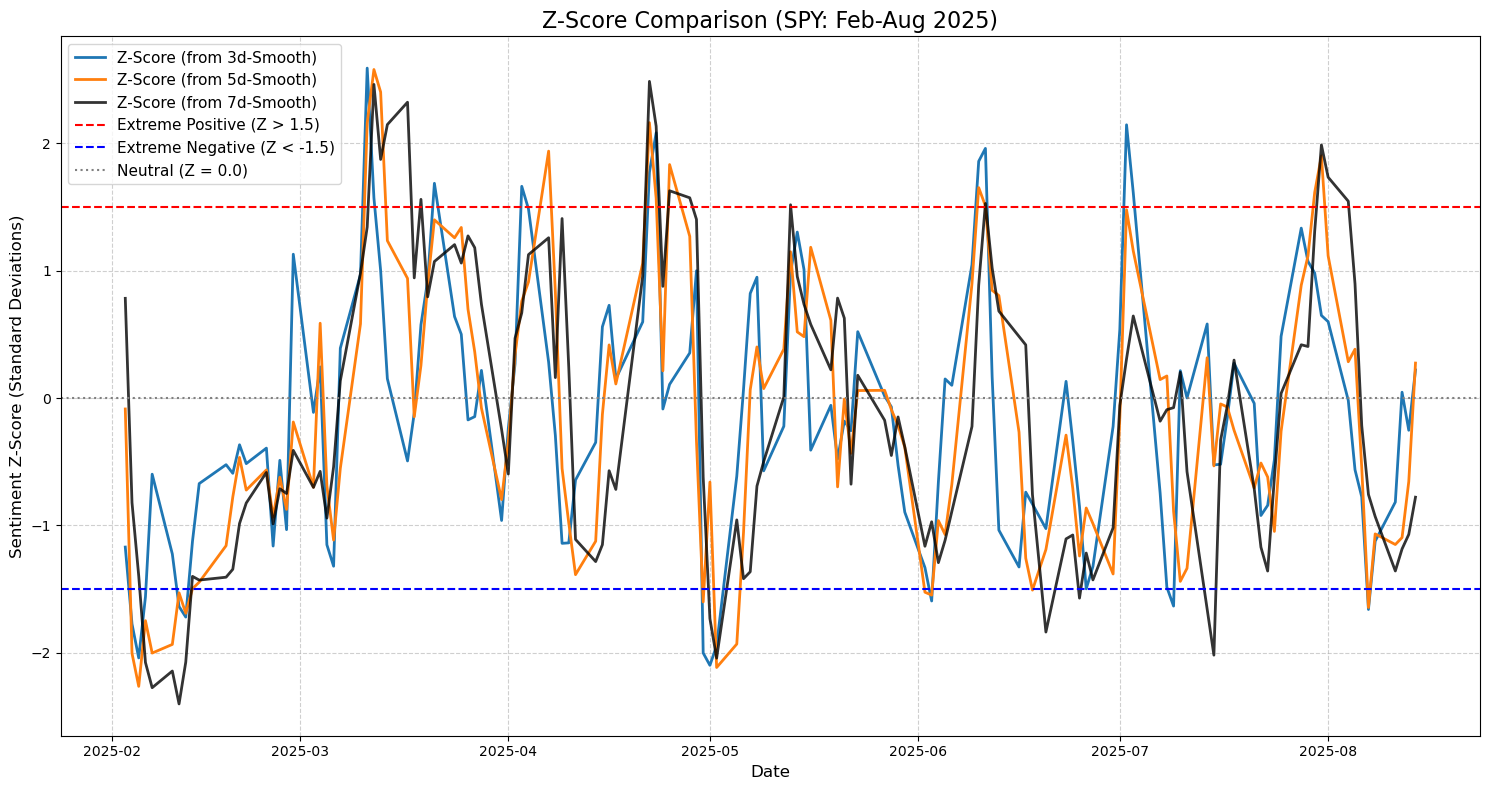

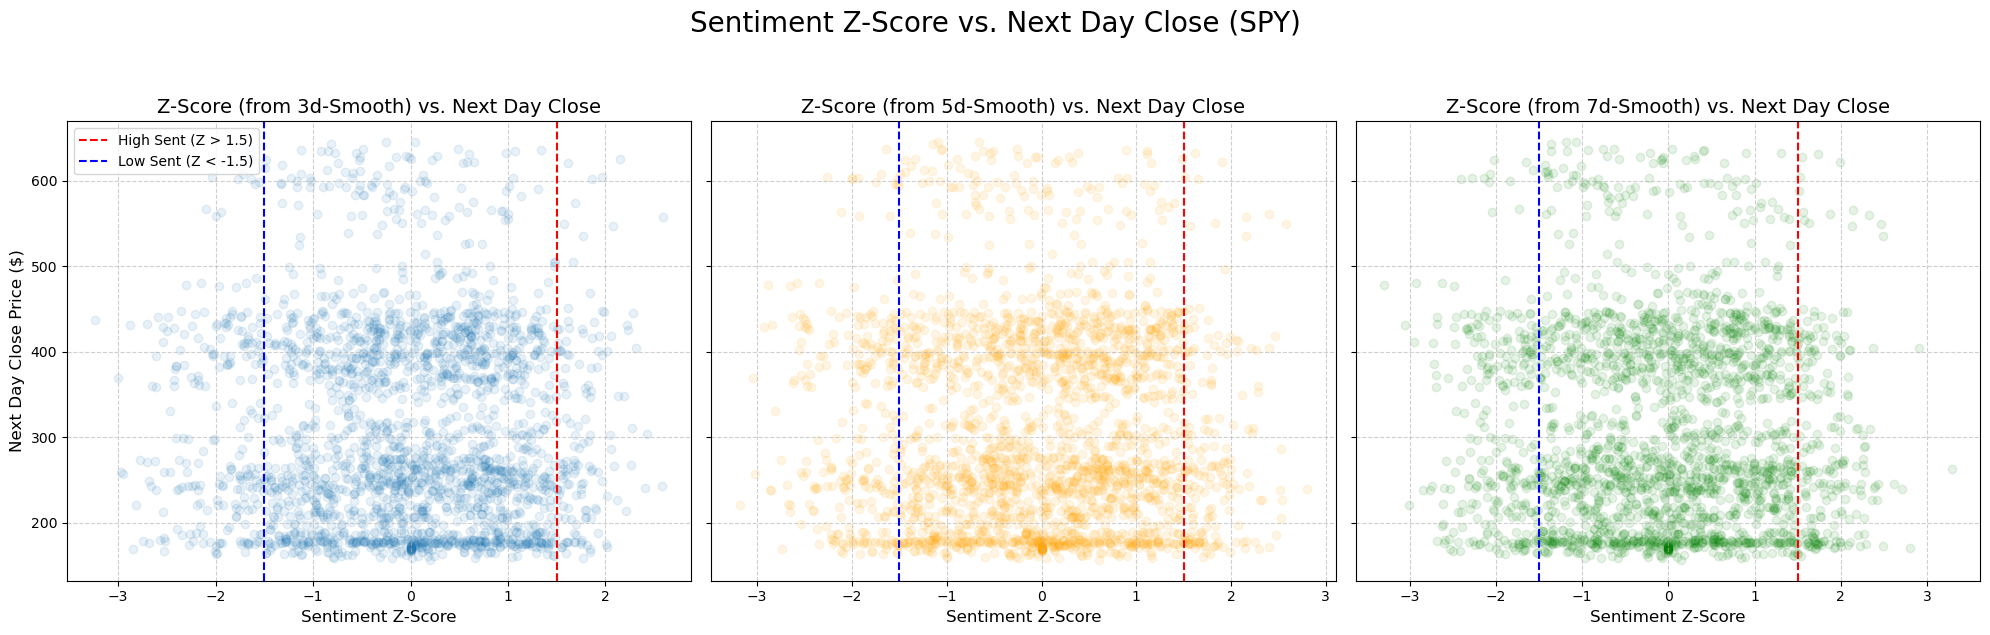

In [5]:
import sent_fea
sent_fea.main()

In [1]:
import pandas as pd
import os

In [12]:
merged = pd.read_csv("merged_OHLCV_Sentiment.csv")
price  = pd.read_csv("Output/price_features.csv")
sent   = pd.read_csv("Output/sent_features_3d.csv")

In [3]:
# columns that are NOT new features in price_features
price_drop = ["Open","High","Low","Close","Volume","Sentiment","label_up_next"]

price_new = price.copy()
for col in price_drop:
    if col in price_new.columns:
        price_new = price_new.drop(columns=col)

# price_new should now be: Ticker, Date, pct_change, SMA5, SMA10, SMA20, EMA12, EMA26, ...
print(price_new.columns)

# sentiment: we keep Ticker, Date, and sentiment feature columns
sent_new = sent.copy()
# if there's any duplicate label or original Sentiment column in here, drop it too
for col in ["Sentiment","label_up_next"]:
    if col in sent_new.columns:
        sent_new = sent_new.drop(columns=col)

print(sent_new.columns)

Index(['Ticker', 'Date', 'pct_change', 'SMA5', 'SMA10', 'SMA20', 'EMA12',
       'EMA26', 'MACD', 'RSI_14', 'ATR_14'],
      dtype='object')
Index(['Ticker', 'Date', 'sent_smooth', 'sent_z_20d', 'sent_high', 'sent_low'], dtype='object')


In [6]:
df = merged.merge(price_new, on=["Ticker","Date"], how="inner") \
           .merge(sent_new,  on=["Ticker","Date"], how="inner")

df = df.sort_values(["Date","Ticker"]).dropna().reset_index(drop=True)
cols = [c for c in df.columns if c != 'label_up_next']  
cols.append('label_up_next')                     
df = df[cols]

os.makedirs("Output", exist_ok=True)
df.to_csv("Output/training_dateset.csv", index=False)

'os.makedirs("Output", exist_ok=True)\ndf.to_csv("Output/training_dateset.csv", index=False)'